In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import cv2
import os

In [2]:
#img = image.load_img("Multicategory_Living/training/cat/A.jpg")
#plt.imshow(img)
#cv2.imread("Multicategory_Living/training/cat/A.jpg").shape

In [3]:
#change range to -0.5 to 0.5?
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [4]:
train

In [5]:
#Validation dataset not being used...what to do with test dataset?
train_dataset = train.flow_from_directory('Multicategory_Living/training',
                                         target_size = (200,200), 
                                         batch_size = 3, 
                                         class_mode = 'categorical')#non-binary output
validation_dataset = train.flow_from_directory('Multicategory_Living/validation',
                                         target_size = (200,200), 
                                         batch_size = 3, 
                                         class_mode = 'categorical')

Found 15 images belonging to 3 classes.
Found 6 images belonging to 3 classes.


In [6]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation = 'relu', input_shape = (200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    ##
                                    tf.keras.layers.Dense(3, activation = 'softmax')#non-binary output, # of categories                                                      
                                    ])

In [7]:
model.compile(
    optimizer = RMSprop(lr= 0.001),
    loss = 'categorical_crossentropy', #uses classes that are > 2
    metrics = ['accuracy']
)

In [8]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch = 5,#The number of samples per gradient update for training 
                     epochs= 30,#The number of iterations over the entire dataset to train on
                     validation_data = validation_dataset)

Epoch 1/30
5/5 [==============================] - 2s 449ms/step - loss: 9.7596 - accuracy: 0.3333 - val_loss: 1.2157 - val_accuracy: 0.3333
Epoch 2/30
5/5 [==============================] - 2s 473ms/step - loss: 1.1885 - accuracy: 0.3333 - val_loss: 1.4547 - val_accuracy: 0.3333
Epoch 3/30
5/5 [==============================] - 2s 455ms/step - loss: 1.1331 - accuracy: 0.3333 - val_loss: 0.9862 - val_accuracy: 0.5000
Epoch 4/30
5/5 [==============================] - 1s 293ms/step - loss: 1.1370 - accuracy: 0.2667 - val_loss: 1.0283 - val_accuracy: 0.5000
Epoch 5/30
5/5 [==============================] - 2s 320ms/step - loss: 1.3679 - accuracy: 0.4667 - val_loss: 1.0079 - val_accuracy: 0.5000
Epoch 6/30
5/5 [==============================] - 1s 291ms/step - loss: 1.1049 - accuracy: 0.6000 - val_loss: 0.9178 - val_accuracy: 0.3333
Epoch 7/30
5/5 [==============================] - 2s 353ms/step - loss: 0.4804 - accuracy: 0.8000 - val_loss: 1.7855 - val_accuracy: 0.3333
Epoch 8/30
5/5 [====

In [9]:
model.summary()
model.get_layer("conv2d_2").get_weights()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 33856)             0

[array([[[[-0.0520583 , -0.04462227, -0.03282215, ...,  0.05367894,
            0.03541736, -0.05741958],
          [-0.02089412,  0.08095059,  0.01138171, ...,  0.01607473,
            0.02756225,  0.010142  ],
          [-0.02212425, -0.08252788,  0.03080085, ...,  0.03022001,
            0.00729845,  0.04274537],
          ...,
          [ 0.07850893, -0.05949123,  0.05478145, ..., -0.01617321,
           -0.0098237 ,  0.03358509],
          [-0.06664561, -0.03565193,  0.06403711, ...,  0.045116  ,
            0.0375888 ,  0.00057865],
          [-0.01102424,  0.02767207,  0.05863108, ...,  0.0504586 ,
           -0.07024422, -0.0132447 ]],
 
         [[-0.01592035,  0.04982561, -0.02898447, ..., -0.02279835,
            0.03724786, -0.03914948],
          [-0.02181316,  0.06277429,  0.0576986 , ..., -0.00148999,
            0.0705243 ,  0.00722238],
          [-0.06016142,  0.02448865,  0.0465894 , ...,  0.0593158 ,
           -0.0317529 , -0.01386163],
          ...,
          [-0

In [10]:
validation_dataset.class_indices

{'bird': 0, 'cat': 1, 'dog': 2}

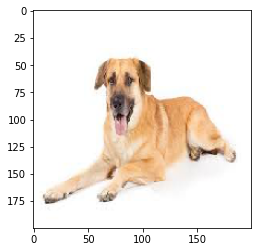

[[0. 1. 0.]]
Cat


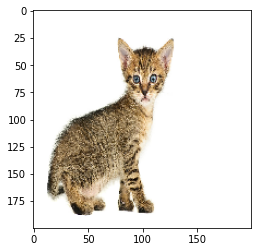

[[0. 1. 0.]]
Cat


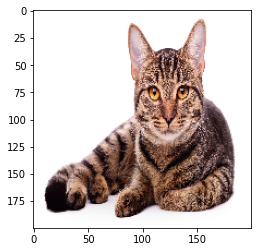

[[0. 1. 0.]]
Cat


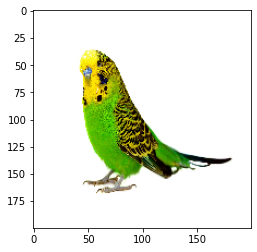

[[1. 0. 0.]]
Bird


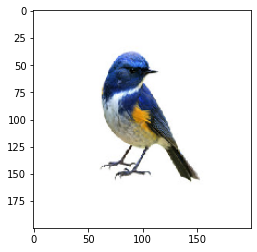

[[0. 0. 1.]]
Dog


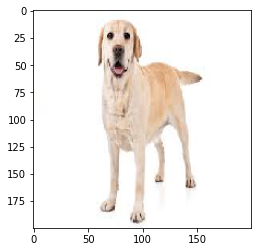

[[0. 0. 1.]]
Dog


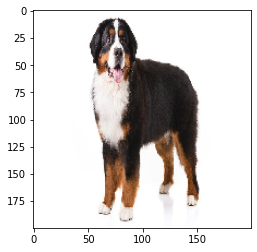

[[0. 0. 1.]]
Dog


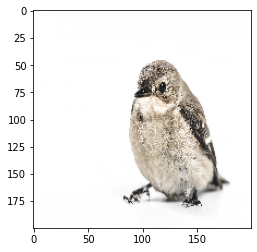

[[0. 1. 0.]]
Cat


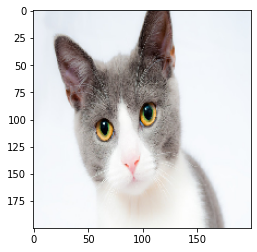

[[0. 1. 0.]]
Cat


In [14]:
def listdir_nohidden(path):
    for f in os.listdir(path):
        if not f.startswith('.'):
            yield f

dir_path = 'Multicategory_Living/testing'
for i in listdir_nohidden(dir_path):
    img = image.load_img(dir_path+'//'+i,target_size = (200,200))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X, axis = 0)
    images = np.vstack([X])
    val = model.predict(images)
    #val is an ndarray, so argmax returns the index of the maximum value in each row (axis =1)
    #since these are binary digits, it returns the index where the value is 1, indicating the class index
    #there is also only one row, so it returns one value, appropriate for the if statement
    print(val)
    #index = (np.argmax(val, axis = 1))
    index = (np.argmax(val))
    if index == 0:
        print("Bird")
    elif index == 1:
        print("Cat")
    else:
        print("Dog")
    
